#####STUDENT DROPOUT ANALYSIS


In [1]:
import kagglehub
path = kagglehub.dataset_download("renecardoso/national-survey-on-school-dropout")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'national-survey-on-school-dropout' dataset.
Path to dataset files: /kaggle/input/national-survey-on-school-dropout


In [2]:
import pandas as pd
import os
files =os.listdir(path)
csv_file=[f for f in files if
f.endswith('.csv')][0]
full_path =os.path.join(path,csv_file)
df=pd.read_csv(full_path)
print("data loaded successfully!")
df.head()


data loaded successfully!


,FOLIO,SEXO,EDAD,edu_inicial,inscrito,nivel_edu,terminado,nt_causa,asesorias,extraord,...,t_o_mujer,t_o_hombre,t_horas,max_nivel_esp,estres,depresion,desespero,antisocial,ENT,FACTOR
0,2,1,13,0.0,1.0,3.0,1.0,0.0,2.0,0.0,...,2.0,2.0,0.0,7.0,1.0,2.0,2.0,2.0,24,809
1,2,2,19,0.0,1.0,9.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,24,809
2,7,2,8,0.0,1.0,3.0,1.0,0.0,2.0,0.0,...,2.0,2.0,40.0,7.0,1.0,2.0,1.0,2.0,22,722
3,7,1,26,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,722
4,9,1,27,0.0,1.0,9.0,1.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,26,425


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(full_path)

df.rename(columns={
    'SEXO': 'SEX', 'EDAD': 'Age', 'estres': 'Stress Level',
    'depresion': 'Depression Level', 't_horas': 'Study Hours',
    'extraord': 'Extra Exams', 'desespe': 'Despair_Level',
    'edu_inicial':'Early Education','indcrito':'Enrolled',
    'inscrito':'enrolled','nivel_edu':'Education level','terminado':'completed',
    'asesorias':'counseling','t_o_mujer':'FEMALE','t_o_hombre':'MALE',
    'max_nivel_esp':'Max level','antisocial':'Antisocial','FOLIO':'SHEET',
    'desespero':'Depression','desespero':'Despair','nt_causa':'cause'

}, inplace=True)

print("Data Loaded and Translated!")
df.head()

Data Loaded and Translated!


,SHEET,SEX,Age,Early Education,enrolled,Education level,completed,cause,counseling,Extra Exams,...,FEMALE,MALE,Study Hours,Max level,Stress Level,Depression Level,Despair,Antisocial,ENT,FACTOR
0,2,1,13,0.0,1.0,3.0,1.0,0.0,2.0,0.0,...,2.0,2.0,0.0,7.0,1.0,2.0,2.0,2.0,24,809
1,2,2,19,0.0,1.0,9.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,24,809
2,7,2,8,0.0,1.0,3.0,1.0,0.0,2.0,0.0,...,2.0,2.0,40.0,7.0,1.0,2.0,1.0,2.0,22,722
3,7,1,26,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,722
4,9,1,27,0.0,1.0,9.0,1.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,26,425


In [4]:
print("Summary Statistics:")
display(df[['Age', 'Stress Level', 'Depression Level', 'Study Hours']].describe())

Summary Statistics:


,Age,Stress Level,Depression Level,Study Hours
count,32343.000000,32343.000000,32343.000000,32343.000000
mean,14.891723,1.026003,1.144544,2.791083
std,7.934174,0.899968,0.953032,5.082199
min,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000
50%,15.000000,1.000000,2.000000,0.000000
75%,21.000000,2.000000,2.000000,5.000000
max,29.000000,2.000000,2.000000,99.000000


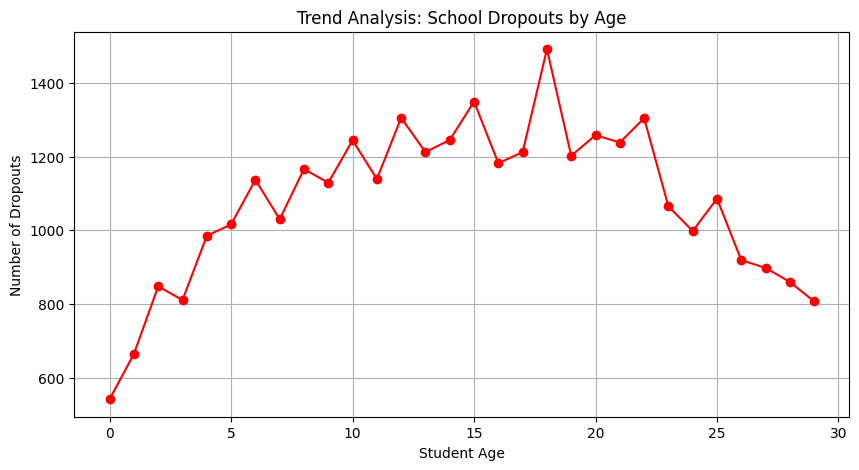

In [5]:
trend_data = df['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(trend_data.index, trend_data.values, marker='o', color='red', linestyle='-')
plt.title('Trend Analysis: School Dropouts by Age')
plt.xlabel('Student Age')
plt.ylabel('Number of Dropouts')
plt.grid(True)
plt.show()

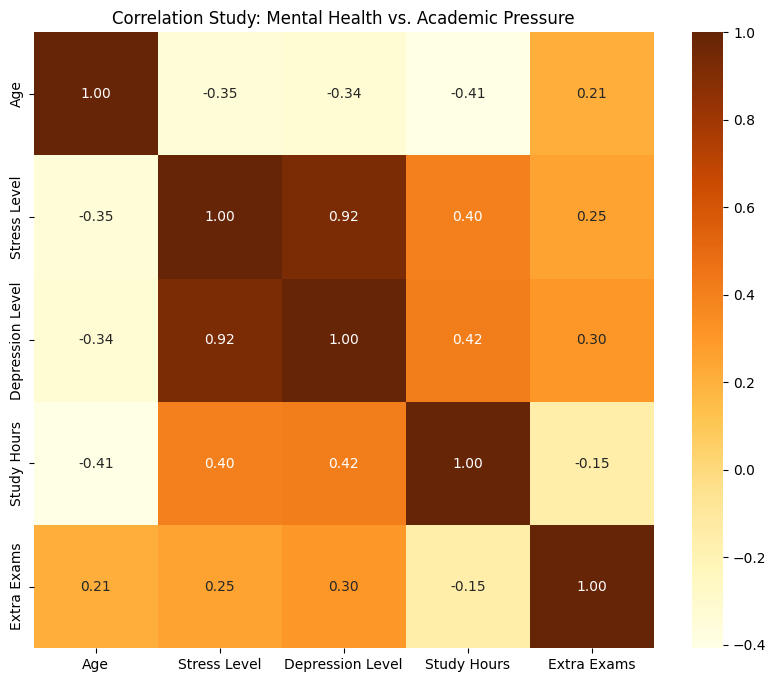

In [6]:
plt.figure(figsize=(10, 8))

corr_cols = ['Age', 'Stress Level', 'Depression Level', 'Study Hours', 'Extra Exams']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('Correlation Study: Mental Health vs. Academic Pressure')
plt.show()

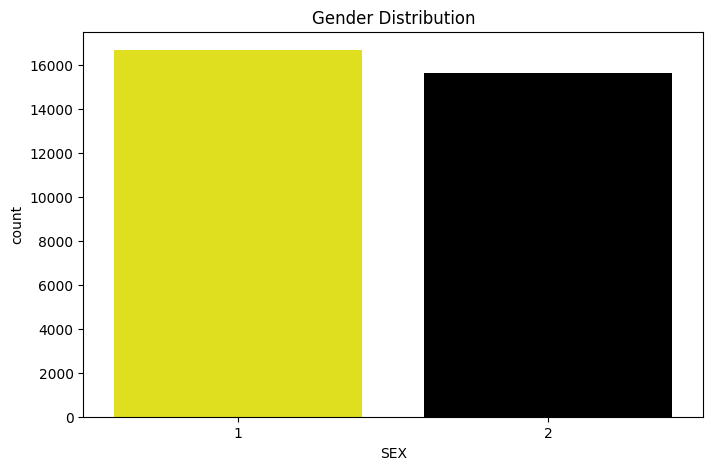

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='SEX',
    hue='SEX',
    palette=['yellow', 'black'],
    legend=False
)
plt.title("Gender Distribution")
plt.show()
